In [204]:
from scipy.stats import rv_discrete
import numpy as np
from pprint import pprint
from itertools import product, accumulate

In [158]:
def mean_square(self):
    return self.var()**0.5


rv_discrete.mean_square = mean_square



In [146]:
import random as rand
import matplotlib.pyplot as plt


def graph(func, test_count=1_000_000, seed=1223):
    if seed:
        rand.seed(seed)

    results = [0]

    for _ in range(test_count):
        results.append(bool(func()) + results[-1])

    results = [el / (n+1) for n, el in enumerate(results[1:])]

    mean = sum(results)/test_count
    s = results[test_count//50:]
    k = max(s) - min(s)
    plt.ylim(mean-k, mean+k)

    real_mean = sum(results[test_count//20:]) / (test_count//20*19)

    plt.plot(results)
    plt.plot([0, test_count], [real_mean, real_mean])

    return real_mean


---
## 1

In [173]:
mas = rv_discrete(values=[
    [7, 8, 11, 14, 15],
    [0.25, 0.2, 0.1, 0.2, 0.25]
])

print(mas.mean())
print(mas.mean_square())


11.0
3.4058772731852835


In [177]:

count = 0
y = []
for i in range(100000):
    if abs(np.random.choice(mas.xk, p=mas.pk, size=1) - mas.mean()) < mas.var() ** 0.5:
      count += 1
    y.append(count/(i+1))


pstat = count/100000
pstat


0.49726

In [221]:
count = 0
N = 100000
t = (abs(mas.rvs(size=N) - mas.mean()) < mas.std()).astype(int)
y = [count/(i+1) for count, i in enumerate(accumulate(t))]

# for i in t:
#     if i:
#         count += 1
#     y.append(count/(i+1))
# pstat = count/100000
sum(t)/N


0.49961

In [212]:
list(accumulate(t))

[1,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 5,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 10,
 11,
 12,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 20,
 21,
 21,
 21,
 22,
 23,
 24,
 24,
 24,
 25,
 25,
 26,
 27,
 27,
 28,
 29,
 30,
 31,
 32,
 32,
 33,
 34,
 35,
 35,
 36,
 36,
 37,
 37,
 37,
 38,
 39,
 39,
 40,
 40,
 40,
 41,
 41,
 41,
 42,
 43,
 44,
 44,
 44,
 45,
 45,
 46,
 46,
 47,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 50,
 50,
 50,
 50,
 51,
 51,
 52,
 53,
 53,
 54,
 54,
 55,
 56,
 56,
 56,
 56,
 56,
 56,
 57,
 57,
 57,
 57,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 63,
 63,
 64,
 64,
 64,
 64,
 64,
 65,
 66,
 67,
 68,
 68,
 68,
 68,
 69,
 70,
 71,
 72,
 72,
 72,
 72,
 73,
 73,
 74,
 75,
 75,
 76,
 76,
 76,
 76,
 77,
 78,
 78,
 79,
 79,
 79,
 80,
 81,
 81,
 82,
 83,
 83,
 83,
 84,
 85,
 85,
 86,
 87,
 87,
 88,
 88,
 88,
 88,
 88,
 88,
 89,
 89,
 90,
 90,
 90,
 91,
 92,
 93,
 93,
 94,
 95,
 96,
 96,
 96,
 96,
 97,
 98,
 99,
 9

---
## 2

In [ ]:
mas = rv_discrete(values=[
    (0, 1),
    (0.4, 0.6)
])

mas.xk = 2**mas.xk
mas.mean()**4

6.553600000000001

---
## 3

In [226]:
mas = rv_discrete(values=[
    np.arange(-6, 5),
    np.full(11, 1/11)
])

mas.mean()**10

0.9999999999999989

In [238]:
m = np.array([mas.rvs(size=10) for i in range(1000)])
m = np.prod(m, axis=1)

sum(m) / 1000



7323.512

---
## 4

In [150]:
mas = rv_discrete(values=[
    (0, 1),
    (0.7, 0.3)
])

mas.xk = mas.xk**2
mas.mean()*90

27.0

---
## 6

12.494935505064495

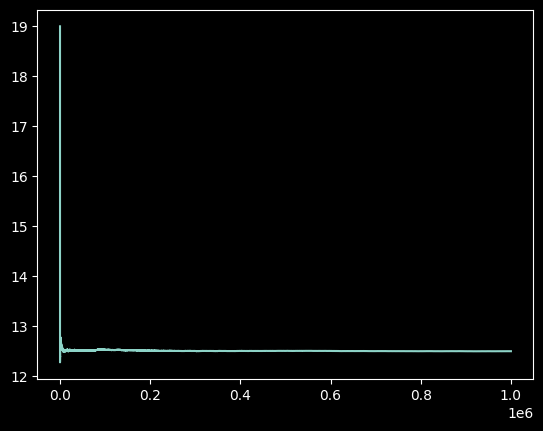

In [151]:
def dices():
    d4 = rand.randint(1, 4)
    d6 = rand.randint(1, 6)
    d12 = rand.randint(1, 12)
    return sum([d4, d6, d12])

rand.seed(1223)

mas = [dices()]
count = 1
s = mas[0]
for i in range(1_000_000):
    count += 1
    s += dices()
    mas.append(s/count)

plt.plot(mas)
s/count

In [152]:
# Аналитика

data = {}
for vals in product(range(1, 5), range(1, 7), range(1, 13)):
    s = sum(vals)
    data.setdefault(s, 0)
    data[s] += 1

for k in data:
    data[k] /= 4*6*12

dis = rv_discrete(values=zip(*data.items()))
print(dis.mean())
print(dis.mean_square())

12.499999999999998
4.01040313850533


---
## 7

1.755955244044756

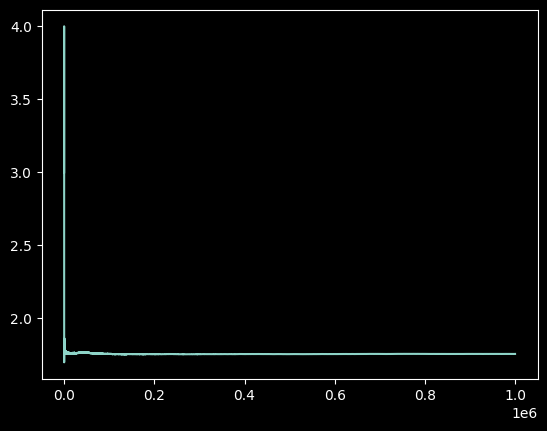

In [153]:
def dices():
    return min(rand.choices(range(1, 7), k=4))


rand.seed(1223)

mas = [dices()]
count = 1
s = mas[0]
for i in range(1_000_000):
    count += 1
    s += dices()
    mas.append(s/count)

plt.plot(mas)
s/count


In [162]:
# Аналитика

data = {}
for vals in product(range(1, 7), repeat=4):
    s = min(vals)
    data.setdefault(s, 0)
    data[s] += 1

for k in data:
    data[k] /= 6**4

dis = rv_discrete(values=zip(*data.items()))
print(dis.mean())
print(dis.var())


1.7554012345679013
0.9100788513564999


---
## 8

5.244199755800244

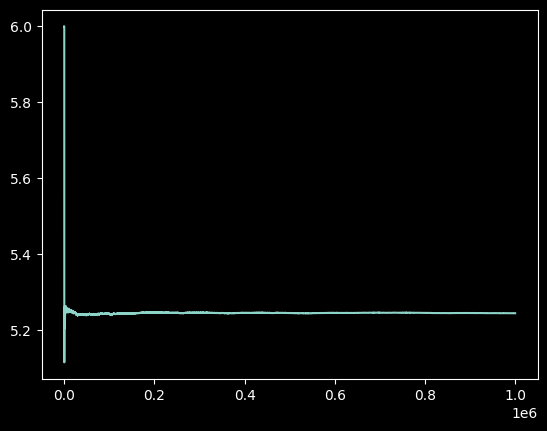

In [155]:
def dices():
    return max(rand.choices(range(1, 7), k=4))


rand.seed(1223)

mas = [dices()]
count = 1
s = mas[0]
for i in range(1_000_000):
    count += 1
    s += dices()
    mas.append(s/count)

plt.plot(mas)
s/count

In [163]:
# Аналитика

data = {}
for vals in product(range(1, 7), repeat=4):
    s = max(vals)
    data.setdefault(s, 0)
    data[s] += 1

for k in data:
    data[k] /= 6**4

dis = rv_discrete(values=zip(*data.items()))
print(dis.mean())
print(dis.var())

5.244598765432099
0.9100788513564986
